# 1 preparing the data and workflow

The problem it to predict customres who can not be able to pay the car loan using machin learning models and choose one with the best effect

## Set the view and install necessary liberties

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [4]:
import numpy as np
import pandas as pd
import datetime
import re
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
from matplotlib.pyplot import figure

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, GridSearchCV

from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.model_selection import StratifiedKFold

from sklearn.preprocessing import StandardScaler

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats.distributions import uniform, randint
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import  metrics


In [142]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Download the data set

In [79]:
dataset = pd.read_csv('train.csv')
dataset.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


## Checking how the data looks like


In [80]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [81]:
dataset.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [82]:
dataset.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

## Checking how looks like churn / non-churn split

In [83]:
dataset['loan_default'].value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

## Change string value into numeric

In [84]:
dataset[['AVERAGE_y','AVERAGE_m']]= [x.split(' ') for x in dataset['AVERAGE.ACCT.AGE']]
dataset['AVERAGE_y']  = [ re.sub("[^0-9]", "", x) for x in dataset['AVERAGE_y']]
dataset['AVERAGE_y'] = pd.to_numeric(dataset['AVERAGE_y'])
dataset['AVERAGE_m']  = [ re.sub("[^0-9]", "", x) for x in dataset['AVERAGE_m']]
dataset['AVERAGE_m']  = pd.to_numeric(dataset['AVERAGE_m'])
dataset['AVERAGE.ACCT.AGE'] =  (dataset['AVERAGE_y']*12)+ dataset['AVERAGE_m']


In [85]:
dataset[['CREDIT_y','CREDIT_m']]= [x.split(' ') for x in dataset['CREDIT.HISTORY.LENGTH']]
dataset['CREDIT_y']  = [ re.sub("[^0-9]", "", x) for x in dataset['CREDIT_y']]
dataset['CREDIT_y'] = pd.to_numeric(dataset['CREDIT_y'])
dataset['CREDIT_m']  = [ re.sub("[^0-9]", "", x) for x in dataset['CREDIT_m']]
dataset['CREDIT_m']  = pd.to_numeric(dataset['CREDIT_m'])
dataset['CREDIT.HISTORY.LENGTH'] =  (dataset['CREDIT_y']*12)+ dataset['CREDIT_m']


## Change date to date value

In [86]:
def change_to_date(dataset,column):
    dataset[column]=[datetime.datetime.strptime(x,"%d-%m-%y") for x in dataset[column]]
    
    
change_to_date(dataset,'Date.of.Birth')


## Drop suppoer columns

In [87]:
dataset.drop(columns=['AVERAGE_y','AVERAGE_m','CREDIT_y','CREDIT_m'],inplace=True)


## Checking unique values in each column

In [88]:
calumn_list = list()

number_of_unique_values = list()

for column in dataset.columns :
    calumn_list.append((column,dataset[column].nunique()))
# calumn_list

## Delete unnecesery columns

In [90]:
dataset.drop(columns=['UniqueID','Employee_code_ID'],inplace=True)

## Checking the data again

In [91]:
different_value=dataset.columns.to_series().groupby(dataset.dtypes).groups
different_value

{int64: ['disbursed_amount', 'asset_cost', 'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'State_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'loan_default'], float64: ['ltv'], datetime64[ns]: ['Date.of.Birth'], object: ['Employment.Type', 'DisbursalDate', 'PERFORM_CNS.SCORE.DESCRIPTION']}

In [92]:
dataset.isna().sum()

disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                          0
PRI.OVERDUE.ACCTS                         0
PRI.CURRENT.BALANCE             

In [93]:
dataset['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

## Most of the type of employment is self-employment, so I will overwrite the 3% of the missing values with the most popular one

In [94]:
dataset['Employment.Type'].fillna(value=dataset['Employment.Type'].value_counts().index[0],inplace=True)
dataset['Employment.Type'].value_counts()

Self employed    135296
Salaried          97858
Name: Employment.Type, dtype: int64

In [95]:
dataset.isna().sum().sum()

0

#  I have to change int value to float

In [96]:
column_to_convert = list()

for column,types in zip(dataset.columns,dataset.dtypes):
    if types == 'int64': 
        column_to_convert.append(column)
column_to_convert


dataset[column_to_convert] = dataset[column_to_convert].astype(float)

## to check data I need to change from non-numeric  to numeric value

In [105]:
pca_data = copy.deepcopy(dataset)
# pca_data.head()

### choosing category values 

In [106]:
column_to_cat = list()

for column,types in zip(pca_data.columns,pca_data.dtypes):
    if  types =='float64' or types == 'int64':
        continue
    else:
        column_to_cat.append(column)
column_to_cat



['Date.of.Birth',
 'Employment.Type',
 'DisbursalDate',
 'PERFORM_CNS.SCORE.DESCRIPTION']

In [107]:
column_to_convert = list()

for column,types in zip(pca_data.columns,pca_data.dtypes):
    if types == 'int64' or types == 'int32' : 
        column_to_convert.append(column)
column_to_convert


pca_data[column_to_convert] = pca_data[column_to_convert].astype(float)

In [108]:
label_encoder = LabelEncoder()
for column in pca_data[column_to_cat]:
    pca_data[column]= label_encoder.fit_transform(pca_data[column])


In [109]:
column_to_num = list()

for column,types in zip(pca_data.columns,pca_data.dtypes):
    if  types =='float64' or types == 'int64' or types == 'int32':
        column_to_num.append(column)
    else:
        continue    

In [110]:
pca_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 39 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   disbursed_amount                     233154 non-null  float64
 1   asset_cost                           233154 non-null  float64
 2   ltv                                  233154 non-null  float64
 3   branch_id                            233154 non-null  float64
 4   supplier_id                          233154 non-null  float64
 5   manufacturer_id                      233154 non-null  float64
 6   Current_pincode_ID                   233154 non-null  float64
 7   Date.of.Birth                        233154 non-null  int64  
 8   Employment.Type                      233154 non-null  int64  
 9   DisbursalDate                        233154 non-null  int64  
 10  State_ID                             233154 non-null  float64
 11  MobileNo_Avl_

## Checing inmporctance of columns

## Check correlation between column and delete non-imporcance

In [112]:
dataset2 = pca_data[column_to_num]

correlations = dataset2.corrwith(pca_data['loan_default'])
correlations = correlations[correlations<.98000]
# correlations=correlations.drop(columns='loan_default',inplace=True)
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations = correlations[correlations<0].sort_values(ascending = False)

print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)


Most Positive Correlations: 
 ltv                                    0.098208
disbursed_amount                       0.077675
PERFORM_CNS.SCORE.DESCRIPTION          0.070217
State_ID                               0.048075
VoterID_flag                           0.043747
NO.OF_INQUIRIES                        0.043678
PRI.OVERDUE.ACCTS                      0.040872
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    0.034462
branch_id                              0.030193
Current_pincode_ID                     0.028419
Employment.Type                        0.028083
supplier_id                            0.027357
DisbursalDate                          0.023599
asset_cost                             0.014261
Date.of.Birth                          0.013728
PAN_flag                               0.002046
dtype: float64

Most Negative Correlations: 
 SEC.OVERDUE.ACCTS              -0.001371
SEC.INSTAL.AMT                 -0.001548
SEC.CURRENT.BALANCE            -0.005531
Driving_flag                   -0

Text(0.5, 1.0, 'Correlation with Churn Rate \n')

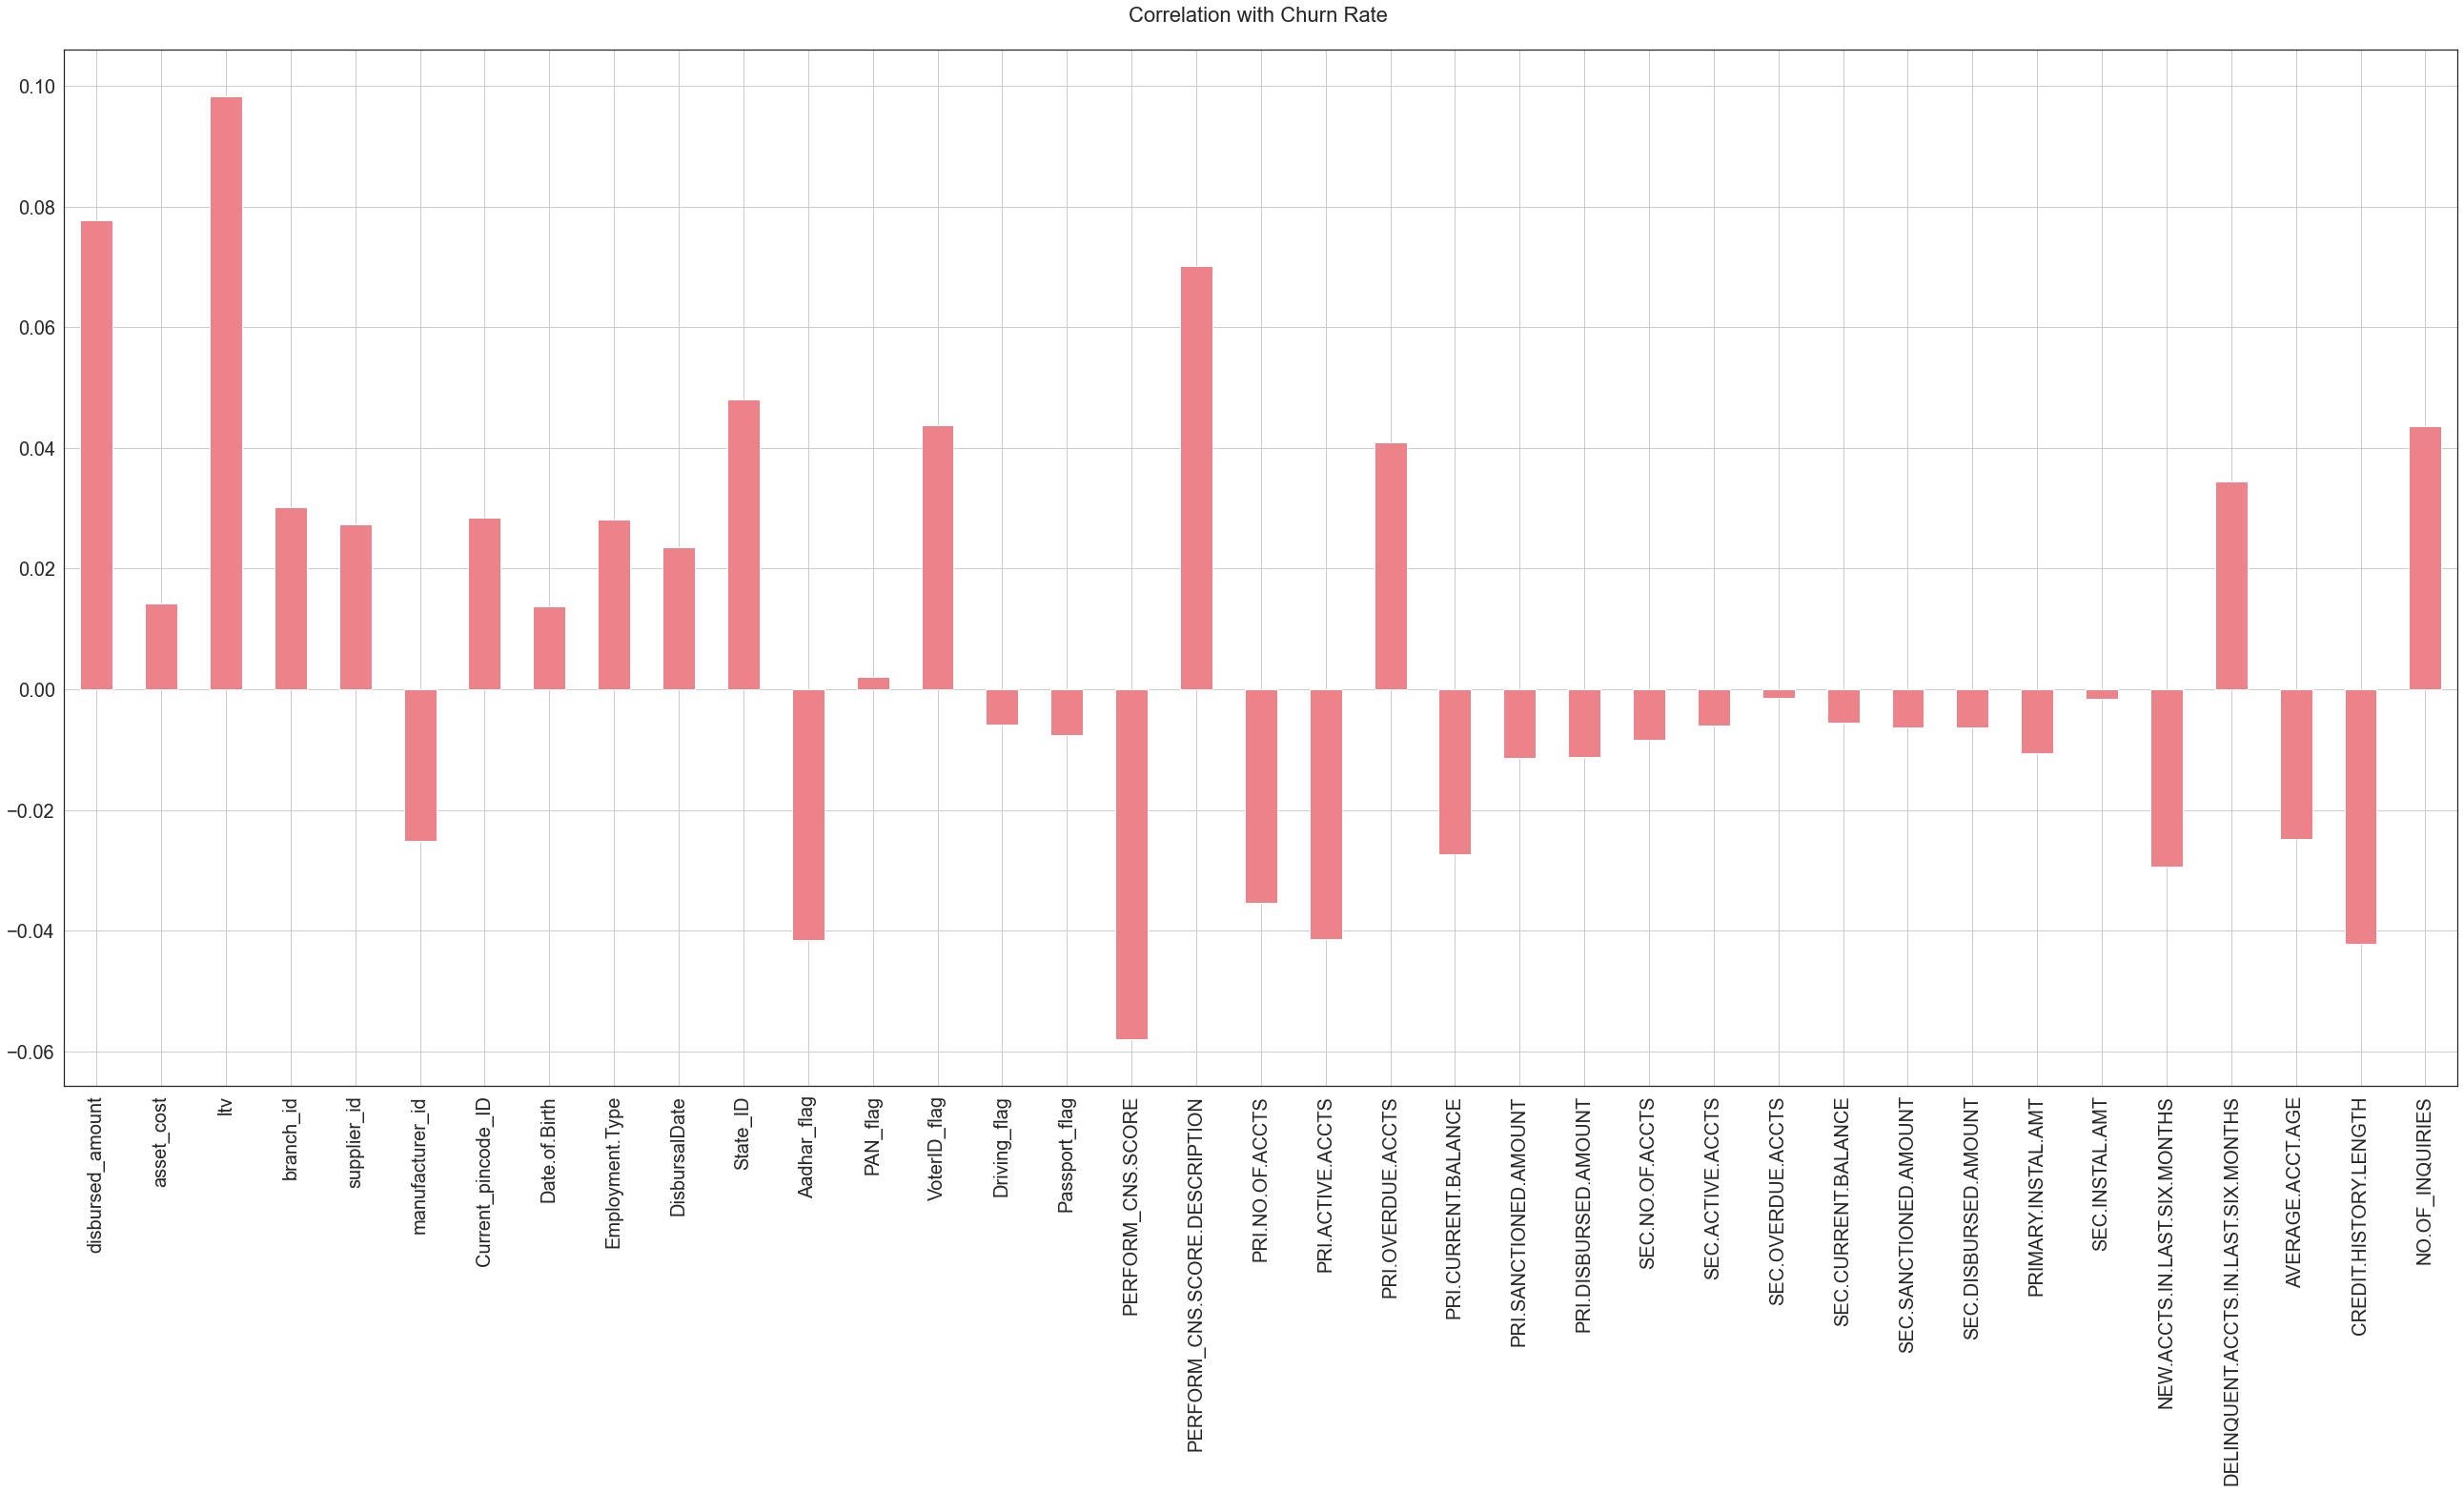

In [113]:
orrelations = dataset2.corrwith(pca_data['loan_default'])
correlations = correlations[correlations!=1]

correlations.plot.bar(
        figsize = (45, 20), fontsize = 20, color = '#ec838a',
        rot = 90, grid = True)

plt.title('Correlation with Churn Rate \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")


<ipython-input-114-b6b37baf9513>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

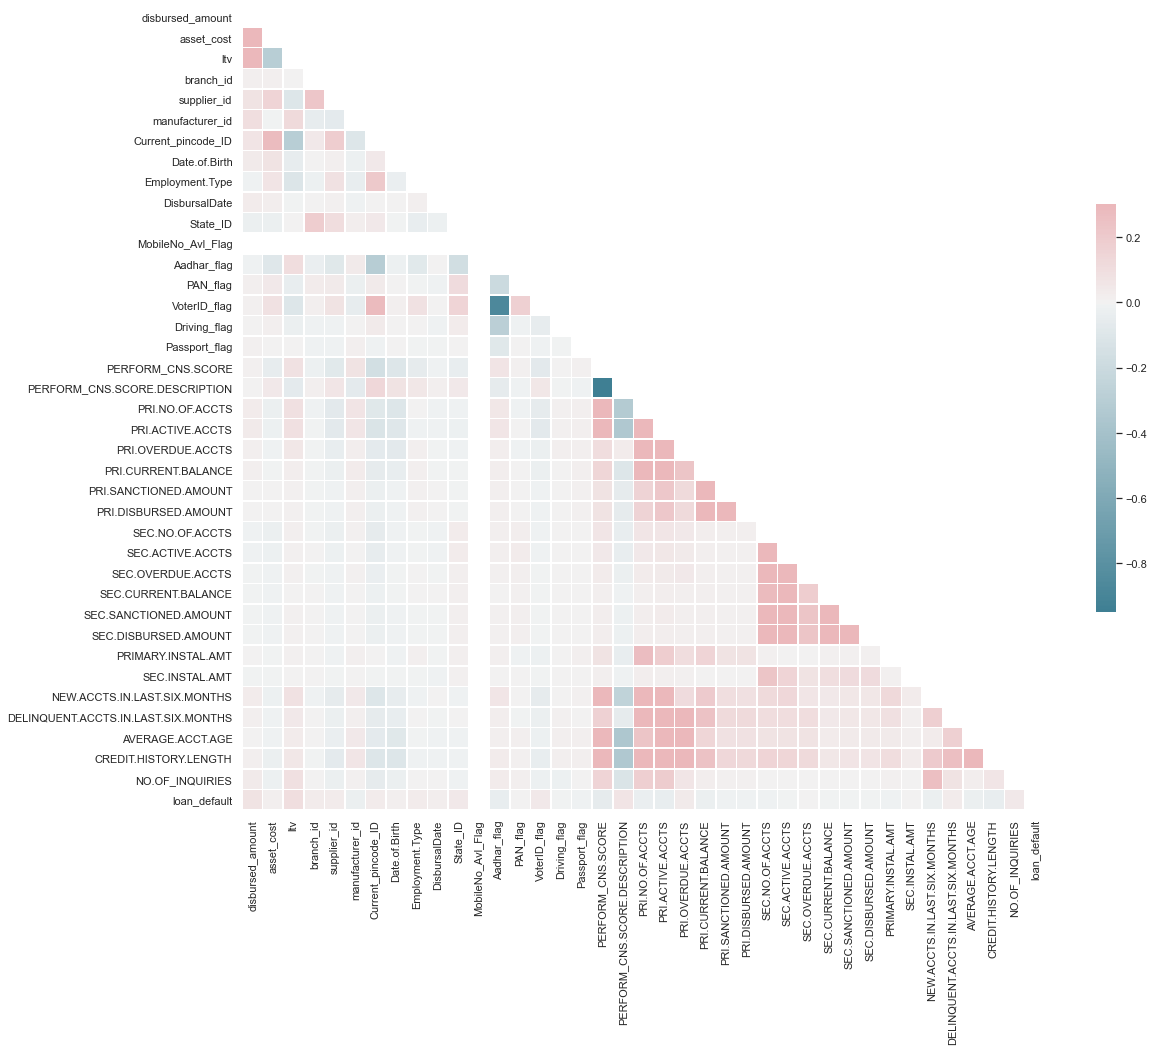

In [114]:
#Set and compute the Correlation Matrix:
sns.set(style="white")
corr = dataset2.corr()
#Generate a mask for the upper triangle:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(18, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#Draw the heatmap with the mask and correct aspect ratio:
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [115]:
model = PCA()
model.fit(pca_data)
pca_features = model.fit_transform(pca_data)

In [116]:
model.explained_variance_

array([1.14930459e+13, 6.81777962e+11, 9.29871158e+10, 2.23643876e+10,
       6.96032628e+09, 2.82748272e+09, 4.72169040e+08, 2.38611512e+08,
       5.59585103e+07, 1.23087911e+07, 1.19754322e+07, 1.17249003e+07,
       4.21754136e+06, 1.07726166e+05, 4.62541667e+03, 7.20038261e+02,
       5.49116902e+02, 4.71636466e+02, 5.95311177e+01, 1.91644602e+01,
       1.53872161e+01, 8.90675545e+00, 2.30479066e+00, 1.23750151e+00,
       4.84758410e-01, 3.82666981e-01, 3.13949289e-01, 2.32706704e-01,
       2.13518092e-01, 1.97494357e-01, 1.61997474e-01, 9.33485253e-02,
       6.53880832e-02, 3.23711645e-02, 2.37047455e-02, 8.46084188e-03,
       6.72512442e-03, 1.90051793e-03, 2.26660365e-18])

In [117]:
model.explained_variance_ratio_

array([9.34335465e-01, 5.54256318e-02, 7.55945472e-03, 1.81812904e-03,
       5.65844751e-04, 2.29862249e-04, 3.83853230e-05, 1.93980952e-05,
       4.54918751e-06, 1.00065206e-06, 9.73551408e-07, 9.53184234e-07,
       3.42868070e-07, 8.75767643e-09, 3.76026588e-10, 5.85360304e-11,
       4.46408551e-11, 3.83420271e-11, 4.83962520e-12, 1.55798863e-12,
       1.25091484e-12, 7.24081116e-13, 1.87369621e-13, 1.00603579e-13,
       3.94087850e-14, 3.11091886e-14, 2.55227341e-14, 1.89180595e-14,
       1.73581075e-14, 1.60554464e-14, 1.31697016e-14, 7.58883577e-15,
       5.31577144e-15, 2.63163719e-15, 1.92709441e-15, 6.87830250e-16,
       5.46723846e-16, 1.54503977e-16, 1.84265180e-31])

## shows relation in barplot sum nad cumulative sum

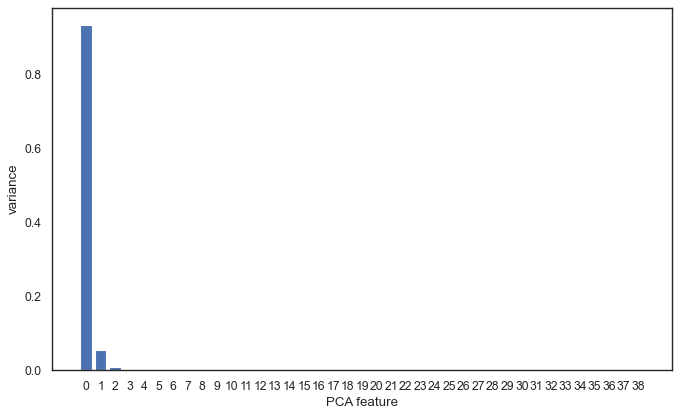

In [118]:
figure(figsize=(10, 6), dpi=80)

features = range(model.n_components_)

plt.bar(features, model.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

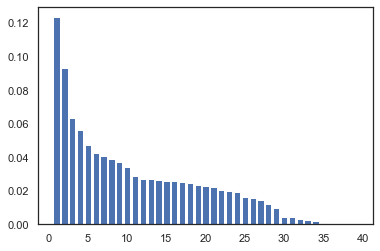

In [119]:
pca = PCA()
pca.fit(scale(pca_data))
plt.bar(range(1,1+pca.n_components_),pca.explained_variance_ratio_)
plt.show()

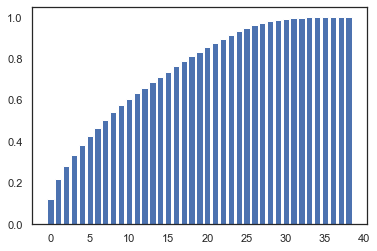

In [120]:
plt.bar(range(pca.n_components_),np.cumsum(pca.explained_variance_ratio_))
plt.show()


### I will leave  23 columns with correlation abouve 0,025

In [122]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 39 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   disbursed_amount                     233154 non-null  float64       
 1   asset_cost                           233154 non-null  float64       
 2   ltv                                  233154 non-null  float64       
 3   branch_id                            233154 non-null  float64       
 4   supplier_id                          233154 non-null  float64       
 5   manufacturer_id                      233154 non-null  float64       
 6   Current_pincode_ID                   233154 non-null  float64       
 7   Date.of.Birth                        233154 non-null  datetime64[ns]
 8   Employment.Type                      233154 non-null  object        
 9   DisbursalDate                        233154 non-null  object        
 

In [123]:
dataset=dataset.drop(columns=['asset_cost','Date.of.Birth','MobileNo_Avl_Flag','PAN_flag','Driving_flag',\
                              'Passport_flag','SEC.NO.OF.ACCTS','SEC.ACTIVE.ACCTS','SEC.OVERDUE.ACCTS',\
                              'SEC.CURRENT.BALANCE','PRIMARY.INSTAL.AMT','SEC.INSTAL.AMT'])

In [124]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 27 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   disbursed_amount                     233154 non-null  float64
 1   ltv                                  233154 non-null  float64
 2   branch_id                            233154 non-null  float64
 3   supplier_id                          233154 non-null  float64
 4   manufacturer_id                      233154 non-null  float64
 5   Current_pincode_ID                   233154 non-null  float64
 6   Employment.Type                      233154 non-null  object 
 7   DisbursalDate                        233154 non-null  object 
 8   State_ID                             233154 non-null  float64
 9   Aadhar_flag                          233154 non-null  float64
 10  VoterID_flag                         233154 non-null  float64
 11  PERFORM_CNS.S

## I have to cut data because i'm not abble to train models

In [125]:
dataset = dataset.groupby('loan_default').sample(n=8000, random_state=1)

# Prepare data to next step (train / test split) - 

In [126]:
X = dataset.drop(['loan_default'], axis=1)
y = dataset['loan_default'].values




label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

print(f"X.shape: {X.shape} y.shape: { y.shape}")

X.shape: (16000, 26) y.shape: (16000,)


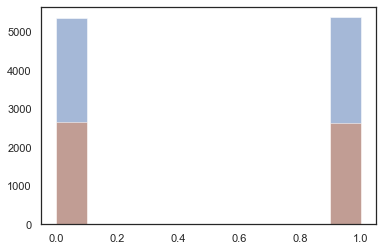

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

In [128]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (10720, 26)
Number transactions y_train dataset:  (10720,)
Number transactions X_test dataset:  (5280, 26)
Number transactions y_test dataset:  (5280,)


In [129]:
column_to_cat = list()

for column,types in zip(X_train.columns,X_train.dtypes):
    if  types =='float64' or types == 'int64':
        continue
    else:
        column_to_cat.append(column)
column_to_cat

X_train[column_to_cat]

,Employment.Type,DisbursalDate,PERFORM_CNS.SCORE.DESCRIPTION
107078,Self employed,27-09-18,No Bureau History Available
107188,Salaried,09-08-18,D-Very Low Risk
149506,Self employed,27-09-18,No Bureau History Available
106355,Self employed,23-10-18,B-Very Low Risk
224800,Self employed,24-10-18,I-Medium Risk
...,...,...,...
157283,Self employed,06-10-18,No Bureau History Available
195528,Self employed,21-09-18,J-High Risk
23884,Salaried,14-09-18,K-High Risk
202274,Self employed,31-10-18,M-Very High Risk


In [130]:
column_to_num = list()

for column,types in zip(X_train.columns,X_train.dtypes):
    if  types =='float64' or types == 'int64':
        column_to_num.append(column)
    else:
        continue        

## Create OneHotEncoder for numeric and category values

### start to biuild Pipe line of pracess

In [131]:
# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [132]:
# Inspired from stackoverflow.com/questions/25239958
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

## OneHotEncoder for category values

In [133]:
# from future_encoders import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(column_to_cat)),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False, handle_unknown = 'ignore')),
    ])


cat_pipeline.fit_transform(X_train)

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [134]:
num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(column_to_num)),
        ("imputer", SimpleImputer(strategy="median")),
    ])

num_pipeline.fit_transform(X_train)

array([[5.3271e+04, 7.8650e+01, 2.5400e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [5.4259e+04, 8.2570e+01, 1.0300e+02, ..., 6.0000e+00, 1.0000e+01,
        1.0000e+00],
       [4.4394e+04, 7.9630e+01, 3.4000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [4.1394e+04, 6.5350e+01, 4.8000e+01, ..., 2.6000e+01, 3.8000e+01,
        0.0000e+00],
       [5.8259e+04, 8.4390e+01, 1.4600e+02, ..., 2.6000e+01, 1.2000e+02,
        0.0000e+00],
       [3.0841e+04, 5.6790e+01, 3.0000e+00, ..., 2.8000e+01, 5.7000e+01,
        0.0000e+00]])

## Connect both Piplines

In [135]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

# Creating models

In [136]:
seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)

## LinearSVC

In [138]:

pipe = Pipeline([('preprocessing', preprocess_pipeline),  
                 ('classifier', LinearSVC(C=1))])

param_grid = {
            'classifier__C': [  0.0001,0.001,0.01, 0.1,] # in test split 0.2 the best is 0,1 , IN SPLIT 0.33 10 or 0.1
            
}

grid_1 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

"\n{'classifier__C': 0.001}\n"

## SVC RBF

In [231]:
pipe_2 = Pipeline([('preprocessing', preprocess_pipeline), ('classifier', SVC(C=1,kernel='rbf', probability=True))])

param_grid_2 = {
            'classifier__C': [  10,100,104,108,110,115],#{'classifier__C': 0.01, 'classifier__gamma': 0.01}
            'classifier__gamma': [0.00000000001,0.0000000001,0.000000001,0.00000001,0.0000001,0.000001]
}

grid_2 = GridSearchCV(pipe_2, param_grid_2, cv=kfold, return_train_score=True)

grid_2.fit(X_train, y_train)
grid_2.best_params_

{'classifier__C': 110, 'classifier__gamma': 1e-09}

In [232]:
results = pd.DataFrame(grid_2.cv_results_)

In [233]:
len(results.mean_test_score)

36

In [218]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img

In [235]:
scores = np.array(results.mean_test_score).reshape(6, 6,1)
scores = scores[:,:,0]
scores

array([[0.55587687, 0.54813433, 0.55858209, 0.55606343, 0.54020522,
        0.52658582],
       [0.55195896, 0.55652985, 0.55876866, 0.55279851, 0.53936567,
        0.52201493],
       [0.55186567, 0.55634328, 0.55867537, 0.55335821, 0.5391791 ,
        0.52117537],
       [0.55186567, 0.55671642, 0.55932836, 0.55345149, 0.53899254,
        0.52164179],
       [0.55186567, 0.5568097 , 0.55951493, 0.55317164, 0.5391791 ,
        0.52145522],
       [0.55177239, 0.55643657, 0.55876866, 0.55289179, 0.53899254,
        0.52294776]])

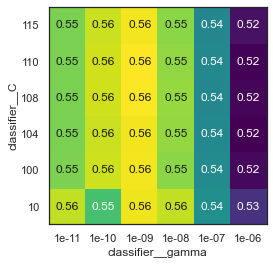

In [236]:
heatmap(scores, xlabel='classifier__gamma', xticklabels=param_grid_2['classifier__gamma'], ylabel='classifier__C', yticklabels=param_grid_2['classifier__C'], cmap="viridis")
plt.show()

In [200]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(grid_2, X_train, y_train, cv=3)
y_train_pred

array([1, 0, 0, ..., 0, 0, 0])

In [201]:

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[4217, 1129],
       [4016, 1358]])

## LogisticRegression

In [140]:
from sklearn.linear_model import LogisticRegression

pipe_3 = Pipeline([('preprocessing', preprocess_pipeline),
                   ('classifier', LogisticRegression(C=1,penalty='l2', max_trials=150))
                  ])

param_grid_3 = {
            'classifier__C': [0.00001,0.0001,0.001 ,0.01] # [0.001 ,0.01, 0.1, 1] best 0.001
            
}

grid_3 = GridSearchCV(pipe_3, param_grid_3, cv=kfold, return_train_score=True)

grid_3.fit(X_train, y_train)
grid_3.best_params_

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

"\n{'classifier__C': 0.0001}\n\n\n"

### Checking  Confusion Matrix for Logistic Regression

In [239]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(grid_3, X_train, y_train, cv=3)
y_train_pred.mean(axis=0)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.5931902985074626

In [198]:


from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[2438, 2908],
       [1923, 3451]])

## KNeighborsClassifier

### Checking corelation between accuracy and K Neighbors

In [142]:
X_train_neig = copy.deepcopy(X_train)
X_test_neig = copy.deepcopy(X_test)
name_columns = []
for name in X_train.columns:
    name_columns.append(name)
name_columns

label_encoder = LabelEncoder()
for column in X_train_neig[name_columns]:
    X_train_neig[column]= label_encoder.fit_transform(X_train_neig[column])

for column in X_test_neig[name_columns]:
    X_test_neig[column]= label_encoder.fit_transform(X_test_neig[column])   

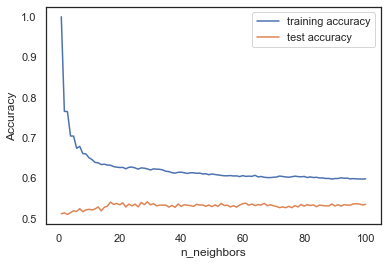

In [143]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 101)

for n_neighbors in neighbors_settings:
    
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train_neig, y_train)
    
    # record training set accuracy
    training_accuracy.append(clf.score(X_train_neig, y_train))
    
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test_neig, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [144]:
# from sklearn.neighbors import KNeighborsClassifier

pipe_4 = Pipeline([('preprocessing', preprocess_pipeline),
                   ('classifier', KNeighborsClassifier(n_neighbors=2, metric='euclidean'))
                  ])



param_grid_4 = {
            'classifier__n_neighbors':list(range(15,65)), #[ 30,40,50,60],
            'classifier__metric': ['euclidean']
}


grid_4 = GridSearchCV(pipe_4, param_grid_4, cv=kfold, return_train_score=True)

grid_4.fit(X_train, y_train)
grid_4.best_params_

"\n{'classifier__metric': 'euclidean', 'classifier__n_neighbors': 49}\n"

## DecisionTreeClassifier

In [146]:
from sklearn.tree import DecisionTreeClassifier

pipe_5 = Pipeline([('preprocessing', preprocess_pipeline), 
                   ('classifier', DecisionTreeClassifier())])

param_grid_5 = {
            'classifier__max_depth': [1,2,3,5],
            'classifier__max_leaf_nodes': [1,2,3,4],
            'classifier__min_samples_split': [1,2,3,5]
            
}


grid_5 = GridSearchCV(pipe_5, param_grid_5, cv=kfold, return_train_score=True)

grid_5.fit(X_train, y_train)
grid_5.best_params_

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score o

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 293, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/p

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score o

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score o

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 293, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/p

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score o

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score o

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 293, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/p

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 293, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/p

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score o

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score o

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 293, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/p

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score o

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan 0.54020522
 0.54020522 0.54020522        nan 0.54020522 0.54020522 0.54020522
        nan 0.54020522 0.54020522 0.54020522        nan        nan
        nan        nan        nan 0.54020522 0.54020522 0.54020522
        nan 0.57350746 0.57350746 0.57350746        nan 0.57350746
 0.57350746 0.57350746        nan        nan        nan        nan
        nan 0.54020522 0.54020522 0.54020522        nan 0.57350746
 0.57350746 0.57350746        nan 0.57350746 0.57350746 0.57350746
        nan        nan        nan        nan        nan 0.54020522
 0.54020522 0.54020522        nan 0.57350746 0.57350746 0.57350746
        nan 0.57350746 0.57350746 0.57350746]
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the train sco

"\n{'classifier__max_depth': 2,\n 'classifier__max_leaf_nodes': 3,\n 'classifier__min_samples_split': 2}\n "

## BaggingClassifier

In [148]:
# from sklearn.ensemble import BaggingClassifier
# from sklearn.tree import DecisionTreeClassifier

pipe_6 = Pipeline([('preprocessing', preprocess_pipeline), 
                   ('classifier', BaggingClassifier(
                                    DecisionTreeClassifier(random_state=42), n_estimators=500,
                                    max_samples=100, bootstrap=True, random_state=42))
                  ])

param_grid_6 = {'classifier__max_samples': [9,10,11],
                'classifier__n_estimators': [49,50,51]
              
             }

grid_6 = GridSearchCV(pipe_6, param_grid_6, cv=kfold, return_train_score=True)

grid_6.fit(X_train, y_train)
grid_6.best_params_

"\n{'classifier__max_samples': 10,\n'classifier__n_estimators': 50}\n"

## RandomForestClassifier

In [150]:
from sklearn.ensemble import RandomForestClassifier

pipe_7 = Pipeline([('preprocessing', preprocess_pipeline), 
                   ('classifier', RandomForestClassifier(n_estimators=500, max_leaf_nodes=16))
                  ])

param_grid_7 = {'classifier__n_estimators': [4,5,6],
              'classifier__max_leaf_nodes': [8,9,10,11],
              'classifier__max_depth': [8,9,10,11]
             }

grid_7 = GridSearchCV(pipe_7, param_grid_7, cv=kfold, return_train_score=True)

grid_7.fit(X_train, y_train)
grid_7.best_params_

"\n{'classifier__max_depth': 5,\n 'classifier__max_leaf_nodes': 10,\n 'classifier__n_estimators': 10}\n "

## ExtraTreesClassifier

In [151]:
from sklearn.ensemble import ExtraTreesClassifier

pipe_8 = Pipeline([('preprocessing', preprocess_pipeline), 
                   ('classifier', ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16))
                  ])

param_grid_8 = {'classifier__max_depth': [5,6,7,8,9],
                'classifier__max_leaf_nodes': [15,16,17],
                'classifier__n_estimators': [52,53,54]
              
              
             }

grid_8 = GridSearchCV(pipe_8, param_grid_8, cv=kfold, return_train_score=True)

grid_8.fit(X_train, y_train)
grid_8.best_params_

"\n{'classifier__max_depth': 7,\n 'classifier__max_leaf_nodes': 16,\n 'classifier__n_estimators': 53}\n "

## GradientBoostingClassifier

In [152]:
from sklearn.ensemble import GradientBoostingClassifier

pipe_9 = Pipeline([('preprocessing', preprocess_pipeline), 
                   ('classifier', GradientBoostingClassifier(
                       n_estimators=1, 
                      learning_rate=0.5, 
                      random_state=42))
                  ])


param_grid_9 = {'classifier__n_estimators': [59,60,61,62,65],
              'classifier__learning_rate': [0.001,0.1,1,10]
             }

grid_9 = GridSearchCV(pipe_9, param_grid_9, cv=kfold, return_train_score=True)

grid_9.fit(X_train, y_train)
grid_9.best_params_

"\n{'classifier__learning_rate': 0.1, 'classifier__n_estimators': 60}\n\n"

##  R XgBoos

In [156]:
# from scipy.stats.distributions import uniform, randint
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import xgboost
#

pipe_10 = Pipeline([('preprocessing', preprocess_pipeline), 
                   ('classifier', xgboost.XGBClassifier(n_estimators=1, 
                      learning_rate=0.5, 
                      random_state=42))
                  ])


param_grid_10 = {
    'classifier__colsample_bytree': uniform(0.5, 0.5),
    'classifier__gamma': uniform(0,2),
    'classifier__learning_rate': uniform(0.001, 0.1-0.001),
    'classifier__max_depth': randint(3, 11),
    'classifier__min_child_weight': randint(1, 11),
    'classifier__n_estimators': randint(50, 400), 
    'classifier__subsample': uniform(0.5, 0.5),
    
}

grid_10 = RandomizedSearchCV(n_iter=100,estimator=pipe_10, 
                             param_distributions=param_grid_10, 
                      cv=kfold, 
                      return_train_score=True)

grid_10.fit(X_train, y_train)
grid_10.best_params_

{'classifier__colsample_bytree': 0.6298562220827013,
 'classifier__gamma': 0.9694842579823808,
 'classifier__learning_rate': 0.09995617867180111,
 'classifier__max_depth': 3,
 'classifier__min_child_weight': 10,
 'classifier__n_estimators': 104,
 'classifier__subsample': 0.7469733103578329}

### Checking Confusion Matrix for R XgBoos

In [199]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(grid_10, X_train, y_train, cv=3)


from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[2929, 2417],
       [1798, 3576]])

## xgboost

In [179]:
# from scipy.stats.distributions import uniform, randint
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# import xgboost




pipe_11 = Pipeline([('preprocessing', preprocess_pipeline), 
                   ('classifier', xgboost.XGBClassifier(n_estimators=1, 
                      learning_rate=0.5, 
                      random_state=42))
                  ])


param_grid_11 ={
    'classifier__subsample': [ 0.8,0.9,1,1.1],
    'classifier__n_estimators': [90, 100, 110,120],
    'classifier__min_child_weight': [1, 5, 10],
    'classifier__max_depth': [2,3, 4],
    'classifier__learning_rate': [0.001, 0.01, 0.05, 0.1],
    'classifier__gamma': [0, 0.5, 1, 2],
    'classifier__colsample_bytree': [ 0.7,0.8, 0.9,]
}

grid_11 = RandomizedSearchCV(n_iter=100,estimator=pipe_11, 
                             param_distributions=param_grid_11, 
                      cv=kfold, 
                      return_train_score=True)

grid_11.fit(X_train, y_train)
grid_11.best_params_

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 818, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 208, in train
    return _train_internal(params, dtrain,
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 75, in _train_internal
    bst.update(dtrain, i, obj)
  File "/opt/anac

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 818, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 208, in train
    return _train_internal(params, dtrain,
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 75, in _train_internal
    bst.update(dtrain, i, obj)
  File "/opt/anac

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 818, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 208, in train
    return _train_internal(params, dtrain,
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 75, in _train_internal
    bst.update(dtrain, i, obj)
  File "/opt/anac

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 818, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 208, in train
    return _train_internal(params, dtrain,
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 75, in _train_internal
    bst.update(dtrain, i, obj)
  File "/opt/anac

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 818, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 208, in train
    return _train_internal(params, dtrain,
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 75, in _train_internal
    bst.update(dtrain, i, obj)
  File "/opt/anac

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 818, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 208, in train
    return _train_internal(params, dtrain,
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 75, in _train_internal
    bst.update(dtrain, i, obj)
  File "/opt/anac

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 818, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 208, in train
    return _train_internal(params, dtrain,
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 75, in _train_internal
    bst.update(dtrain, i, obj)
  File "/opt/anac

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 818, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 208, in train
    return _train_internal(params, dtrain,
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 75, in _train_internal
    bst.update(dtrain, i, obj)
  File "/opt/anac

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 818, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 208, in train
    return _train_internal(params, dtrain,
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 75, in _train_internal
    bst.update(dtrain, i, obj)
  File "/opt/anac

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 818, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 208, in train
    return _train_internal(params, dtrain,
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 75, in _train_internal
    bst.update(dtrain, i, obj)
  File "/opt/anac

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 818, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 208, in train
    return _train_internal(params, dtrain,
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 75, in _train_internal
    bst.update(dtrain, i, obj)
  File "/opt/anac

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 818, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 208, in train
    return _train_internal(params, dtrain,
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 75, in _train_internal
    bst.update(dtrain, i, obj)
  File "/opt/anac

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 818, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 208, in train
    return _train_internal(params, dtrain,
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 75, in _train_internal
    bst.update(dtrain, i, obj)
  File "/opt/anac

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 818, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 208, in train
    return _train_internal(params, dtrain,
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 75, in _train_internal
    bst.update(dtrain, i, obj)
  File "/opt/anac

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 818, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 208, in train
    return _train_internal(params, dtrain,
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 75, in _train_internal
    bst.update(dtrain, i, obj)
  File "/opt/anac

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 818, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 208, in train
    return _train_internal(params, dtrain,
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 75, in _train_internal
    bst.update(dtrain, i, obj)
  File "/opt/anac

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 818, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 208, in train
    return _train_internal(params, dtrain,
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 75, in _train_internal
    bst.update(dtrain, i, obj)
  File "/opt/anac

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.60755597        nan        nan 0.57276119 0.6073694  0.60009328
 0.60363806 0.59188433        nan        nan 0.59057836        nan
 0.60671642 0.57276119 0.59402985 0.58451493 0.60373134 0.60699627
 0.59113806 0.60867537        nan        nan        nan 0.60335821
 0.59169776 0.60354478 0.60447761 0.60298507 0.57751866 0.60886194
 0.57826493 0.58619403 0.60755597 0.58432836 0.60615672 0.59039179
 0.58404851 0.59067164 0.5988806  0.60587687        nan        nan
 0.60755597 0.58348881 0.59794776 0.60652985 0.59906716        nan
 0.60186567 0.59057836 0.6005597  0.59636194 0.60177239        nan
 0.60438433 0.5858209  0.59906716 0.59384328 0.58190299 0.60130597
 0.58227612        nan        nan 0.60559701        nan 0.60298507
 0.60233209 0.60746269        nan 0.58339552 0.59347015 0.58432836
        nan 0.60867537        nan        nan 0.602985

{'classifier__subsample': 0.8,
 'classifier__n_estimators': 110,
 'classifier__min_child_weight': 10,
 'classifier__max_depth': 3,
 'classifier__learning_rate': 0.05,
 'classifier__gamma': 2,
 'classifier__colsample_bytree': 0.7}

## AdaBoostClassifier

In [163]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

pipe_12 = Pipeline([('preprocessing', preprocess_pipeline), 
                   ('classifier', AdaBoostClassifier(
                        DecisionTreeClassifier(max_depth=1), 
                        n_estimators=1,
                        learning_rate=0.5, 
                        algorithm="SAMME.R",
                        random_state=42)
                   )
                  ])


param_grid_12 = {'classifier__n_estimators': [52,53,54,55,56],
              'classifier__learning_rate': [0.1, 0.2,0.5,0.8,0.9, 1,1.1,1.2,1.5],
             }

grid_12 = GridSearchCV(pipe_12, param_grid_12, cv=kfold, return_train_score=True)

grid_12.fit(X_train, y_train)
grid_12.best_params_

"\n{'classifier__learning_rate': 1, 'classifier__n_estimators': 55}\n"

In [184]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
                ('grid_5', grid_5.best_estimator_), 
                ('grid_6', grid_6.best_estimator_), 
                ('grid_8', grid_8.best_estimator_),
                ('grid_9', grid_9.best_estimator_),
               ],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('grid_5',
                              Pipeline(steps=[('preprocessing',
                                               FeatureUnion(transformer_list=[('num_pipeline',
                                                                               Pipeline(steps=[('select_numeric',
                                                                                                DataFrameSelector(attribute_names=['disbursed_amount',
                                                                                                                                   'ltv',
                                                                                                                                   'branch_id',
                                                                                                                                   'supplier_id',
                                                                                                            

# Comparing Models

In [237]:
from sklearn import  metrics


models = []
models.append(('SVM linear', grid_1.best_estimator_))
models.append(('SVM rbf', grid_2.best_estimator_))
models.append(('LR', grid_3.best_estimator_))
models.append(('KNN', grid_4.best_estimator_))
models.append(('DecisionTreeClassifier', grid_5.best_estimator_))
models.append(('BaggingClassifier', grid_6.best_estimator_))
models.append(('RandomForestClassifier', grid_7.best_estimator_))
models.append(('ExtraTrees', grid_8.best_estimator_))
models.append(('GrBoos', grid_9.best_estimator_))
models.append(('R XgBoos', grid_10.best_estimator_))
models.append(('XgBoos', grid_11.best_estimator_)) #grid_11
models.append(('AdaBoost', grid_12.best_estimator_))
models.append(('voting_clf', voting_clf))




precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
for name, model in models:
    print(name)
    print("recall_score: {}".format( metrics.recall_score(y_test , model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test , model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test , model.predict(X_test)) ))
    
    if (name == 'SVM linear'):
        print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.decision_function(X_test)) ))            
    else:
        print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]) ))
    
    precision_score.append(metrics.precision_score(y_test , model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test , model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test , model.predict(X_test)))
    if (name == 'SVM linear'):
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.decision_function(X_test)))        
    else:    
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]))

SVM linear
recall_score: 0.9931454683929931
f1_score: 0.6626016260162602
accuracy_score: 0.49696969696969695
roc_auc_score: 0.5360289057715696
SVM rbf
recall_score: 0.682025894897182
f1_score: 0.6017134218041323
accuracy_score: 0.5509469696969697
roc_auc_score: 0.5703595314606529
LR
recall_score: 0.6378522467631379
f1_score: 0.5806898942624372
accuracy_score: 0.5418560606060606
roc_auc_score: 0.5615937890815341
KNN
recall_score: 0.5936785986290937
f1_score: 0.5676315310395048
accuracy_score: 0.5501893939393939
roc_auc_score: 0.5755789878158879
DecisionTreeClassifier
recall_score: 0.7174409748667174
f1_score: 0.6177049180327869
accuracy_score: 0.5583333333333333
roc_auc_score: 0.5617930887634007
BaggingClassifier
recall_score: 0.6492764661081493
f1_score: 0.5790456783834267
accuracy_score: 0.5304924242424243
roc_auc_score: 0.5354515249797545
RandomForestClassifier
recall_score: 0.6016755521706016
f1_score: 0.5882352941176472
accuracy_score: 0.581060606060606
roc_auc_score: 0.61386927777

SVM linear
SVM rbf
LR
KNN
DecisionTreeClassifier
BaggingClassifier
RandomForestClassifier
ExtraTrees
GrBoos
R XgBoos
XgBoos
AdaBoost
voting_clf


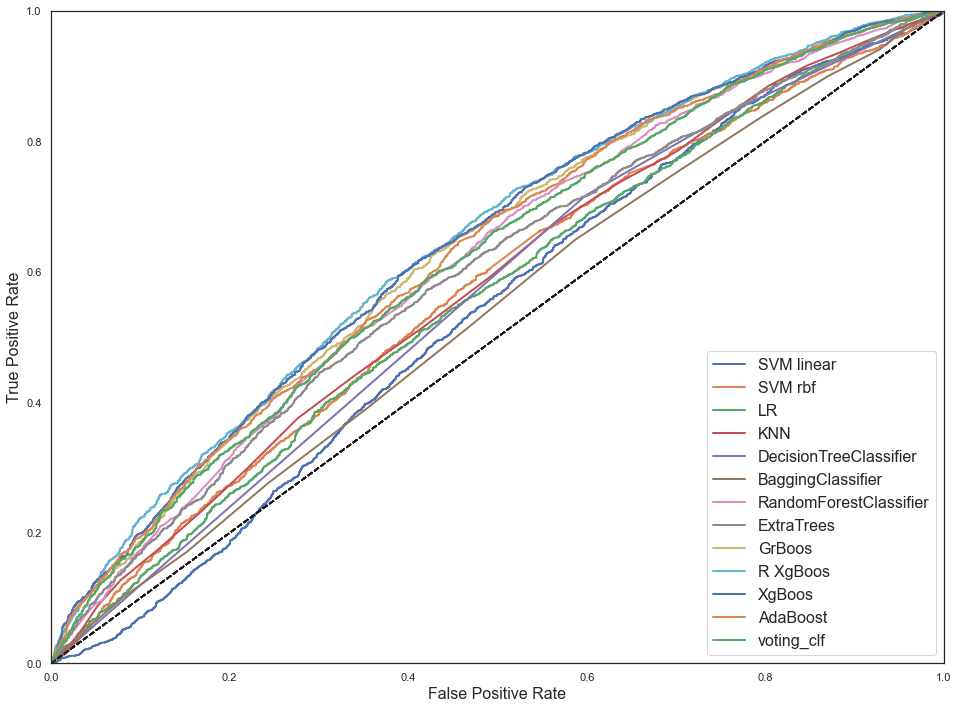

In [229]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(16, 12))
for name, model in models:
    print(name)
    if (name == 'SVM linear'):
        y_scores = model.decision_function(X_test)
    else: 
        y_scores = model.predict_proba(X_test)[:,1]        
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    plot_roc_curve(fpr, tpr, name)

plt.legend(loc="lower right", fontsize=16)
plt.show()
    

In [230]:
valuse_list = []
for name,model in models:
    valuse_list.append(name)

d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
     'roc_auc_score' : roc_auc_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=valuse_list)

df

,Method,precision_score,recall_score,f1_score,accuracy_score,roc_auc_score
0,SVM linear,0.497141,0.993145,0.662602,0.496970,0.536029
1,SVM rbf,0.538323,0.682026,0.601713,0.550947,0.570391
2,LR,0.532930,0.637852,0.580690,0.541856,0.561594
3,KNN,0.543774,0.593679,0.567632,0.550189,0.575579
4,DecisionTreeClassifier,0.542314,0.717441,0.617705,0.558333,0.561793
5,BaggingClassifier,0.522525,0.649276,0.579046,0.530492,0.535452
6,RandomForestClassifier,0.575382,0.601676,0.588235,0.581061,0.613869
7,ExtraTrees,0.551468,0.679360,0.608770,0.565720,0.595462
8,GrBoos,0.579948,0.674029,0.623459,0.595076,0.631275
9,R XgBoos,0.587366,0.665651,0.624063,0.601136,0.641572
